<a href="https://colab.research.google.com/github/yucachen/MLTSA25_YChen/blob/main/In_Class_Code/class_GP_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Processes Demo

In [1]:
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor # typically, would not use for gaussian processes
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel, ExpSineSquared

In [4]:
np.random.seed(302)
t = [1., 3., 5., 6., 7., 8.]
t_ = np.atleast_2d(t).T # to make it 2D for sklearn
t_

array([[1.],
       [3.],
       [5.],
       [6.],
       [7.],
       [8.]])

In [20]:
def f(x):
    """The function to predict."""
    np.random.seed(302)
    x = np.array(x).ravel()
    return np.random.rand(len(x))

In [21]:
f(t)

array([0.63628121, 0.82504234, 0.34164473, 0.73963926, 0.46915689,
       0.54279063])

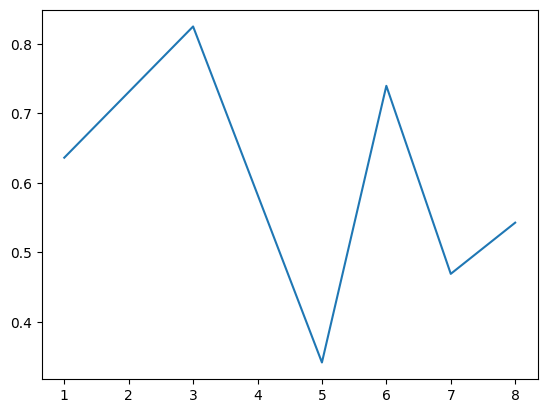

In [22]:
plt.plot(t_.ravel(), f(t)) # ravel makes it 1D with "fake" axis

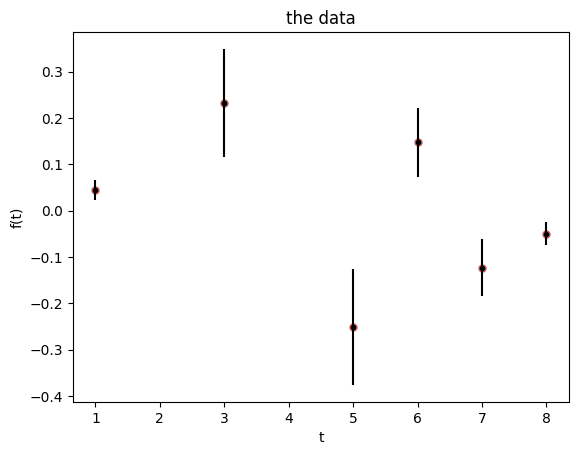

In [23]:
# Observations
y = f(t_)
ymean = y.mean()
y = y - ymean #if the data ms mean zero I can assume N(0,sigma)

# evenly sampled time axis
t_pred = np.atleast_2d(np.linspace(0, 10, 1000)).T
yerr = np.abs(y/2) # this is the uncertainty
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
# in our model the uncertainty are the same as the deviation from the mean

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("the data");

In [24]:
t_pred.shape, t_pred.ravel().shape

((1000, 1), (1000,))

# just the kernel

In [26]:
# any one of the kernels is a function
RBF?

In [27]:
GaussianProcessRegressor()

GaussianProcessRegressor()

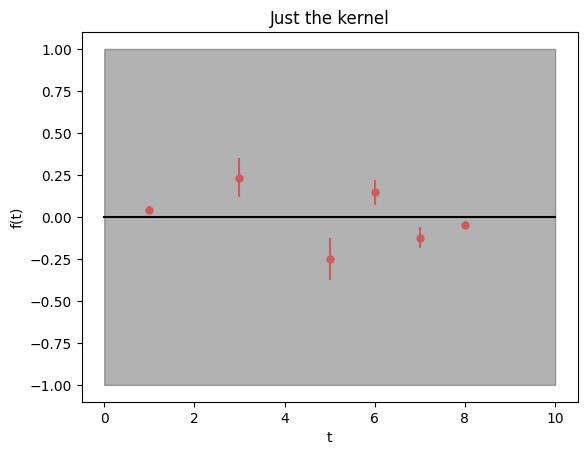

In [31]:
# invoke model, set hyperparameters
kernel = RBF(10, (1e-2, 1e2)) # range of possible values to learn in kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9) # takes kernel function

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='IndianRed')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("Just the kernel");

# not learning anything, just showing the kernel (all the potential predictions)

# No noise: model passes through data

---

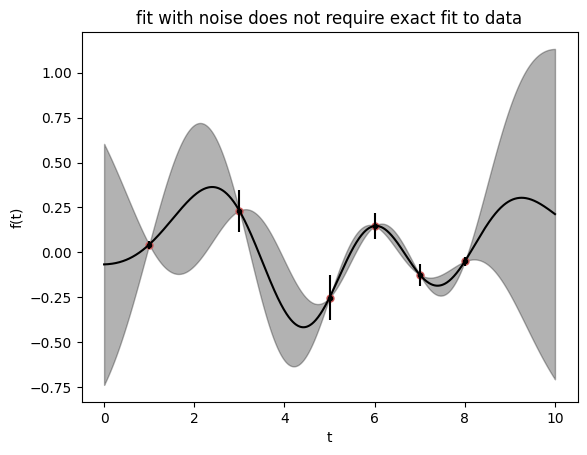

In [35]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=0) # this is the variance of the data)

gp.fit(t_, y) # important for HW to modify for fitting!

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

# returns the family of functions that the kernel has enabled

# With noise: model passes through data


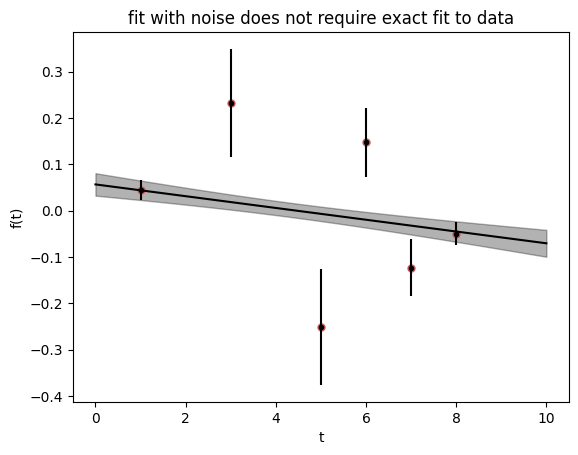

In [38]:
# adding in uncertainty - a prior!

kernel = RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=(yerr)**2) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

# Let's try a more complicated kernel

## with white noise

In [ ]:
WhiteKernel?

1**2 * RBF(length_scale=10.1) + WhiteKernel(noise_level=1e-05)


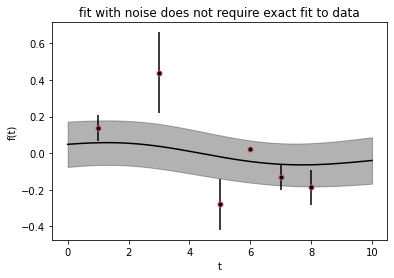

In [ ]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = 1.0 * RBF(length_scale=10.10, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,
                             alpha=(yerr)**2 ) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.3, color='k')
pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");

print(gp.get_params()["kernel"])


## add a periodic component

# these fits do not converge! rerun and you will get a different fit!

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


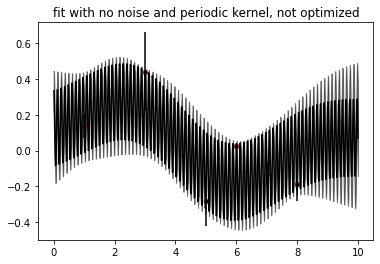

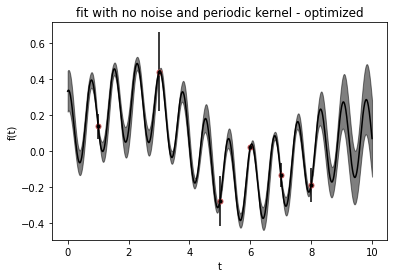

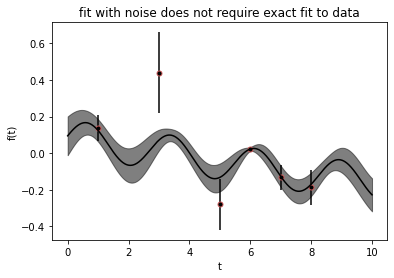

In [ ]:
# Add noise and fit to data using Maximum Likelihood Estimation of the parameters
kernel = (1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) +
         ExpSineSquared(length_scale=10, periodicity=5) +
         WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)))


gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')
pl.title("fit with no noise and periodic kernel, not optimized");

# add periodicity bounds
kernel = (1.0 * RBF(length_scale=10.0, length_scale_bounds=(1e-2, 1e3)) +
         ExpSineSquared(length_scale=10, periodicity=5, periodicity_bounds=(1e-01, 10)) +
         WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1)))

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=0) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with no noise and periodic kernel - optimized");

# add errors to the fit

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=19,
                             alpha=yerr**2) # this is the variance of the data)
gp.fit(t_, y)

# Make the prediction on the time axis (ask for MSE as well)
y_pred, sigma = gp.predict(t_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
pl.figure()
pl.plot(t_, y, '.', color='IndianRed', markersize=10, label='Observations')
pl.errorbar(t_, y, yerr=yerr, fmt='.', color='k')
pl.plot(t_pred, y_pred, 'k-', label='Prediction')
pl.fill_between(t_pred.ravel(), y_pred - sigma, y_pred + sigma,
         alpha=.5, color='k')

pl.xlabel('t')
pl.ylabel('f(t)')
pl.title("fit with noise does not require exact fit to data");


# Another package: George

In [ ]:
!pip install george

In [ ]:
kernels.ExpSquaredKernel?

Initial ln-likelihood: 0.11


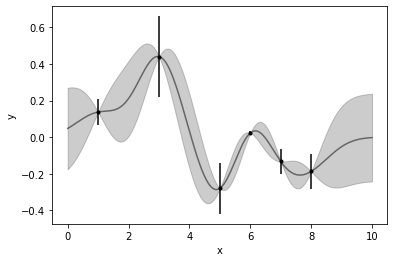

In [ ]:
import george
from george import kernels

kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)
gp.compute(t, 0) # fit without errors

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred.ravel(), pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred.ravel(), pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))


Initial ln-likelihood: 0.57
Initial parameters: -2.86


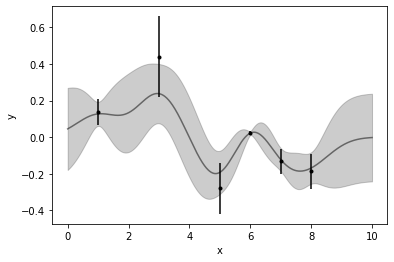

In [ ]:
kernel = np.var(y) * kernels.ExpSquaredKernel(0.5)
gp = george.GP(kernel)
gp.compute(t, yerr) # this is the uncertainty! y_err, which in our made up data is =y

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print("Initial parameters: {0:.2f}".format(*gp.get_parameter_vector()))


Optimize the parameters explicitly

In [ ]:
from scipy.optimize import minimize
def neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)
print("\nFinal ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print("Optimized parameters: {0:.2f}".format(*gp.get_parameter_vector()))

      fun: -1.1612739591456656
 hess_inv: array([[1.03525107, 0.201147  ],
       [0.201147  , 4.07607251]])
      jac: array([3.72896234e-06, 1.00220196e-06])
  message: 'Optimization terminated successfully.'
     nfev: 8
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([-4.02546291, -1.05872344])

Final ln-likelihood: 1.16
Optimized parameters: -4.03


Final ln-likelihood: 1.16
Optimized parameters: -4.03


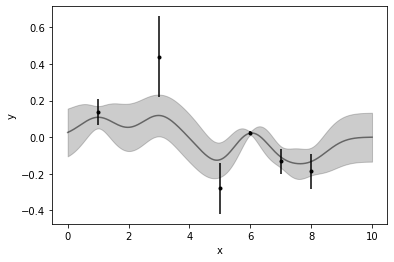

In [ ]:
pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred.ravel(), pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");
print("Final ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
print("Optimized parameters: {0:.2f}".format(*gp.get_parameter_vector()))

# add a periodic kernel

Initial parameters -2.86 -0.69
Initial ln-likelihood: 0.39
Optimized parameters -4.03 -1.05
Optimized ln-likelihood: 1.16
Optimized parameters -2.86 -0.85
Optimized ln-likelihood: 0.16


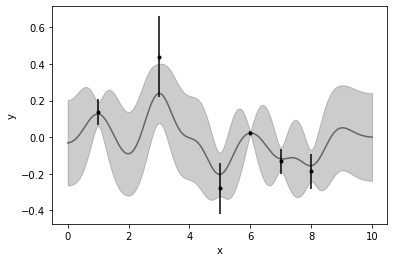

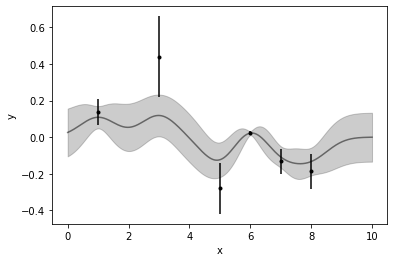

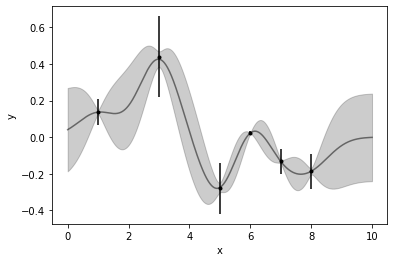

In [ ]:
kernel = np.var(y) * kernels.Product(kernels.ExpSquaredKernel(0.5),
                                     kernels.CosineKernel(1))
gp = george.GP(kernel)
gp.compute(t, yerr)

pred, pred_var = gp.predict(y, t_pred, return_var=True)

pl.fill_between(t_pred.ravel(), pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred.ravel(), pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Initial parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
#print(result)
gp.set_parameter_vector(result.x)

pred, pred_var = gp.predict(y, t_pred, return_var=True)
pl.figure()
pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))

gp.compute(t, 0.1*np.abs(y))

pred, pred_var = gp.predict(y, t_pred, return_var=True)

result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
#print(result)
gp.set_parameter_vector(result.x)

pred, pred_var = gp.predict(y, t_pred, return_var=True)
pl.figure()
pl.fill_between(t_pred[:,0], pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
pl.plot(t_pred[:,0], pred, "k", lw=1.5, alpha=0.5)
pl.errorbar(t, y, yerr=yerr, fmt=".k", capsize=0)
pl.xlabel("x")
pl.ylabel("y");

print("Optimized parameters {:.2f} {:.2f}".format(*gp.get_parameter_vector()))
print("Optimized ln-likelihood: {0:.2f}".format(gp.log_likelihood(y)))
